In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from models import LSTNet
import importlib

from utils import *;
import Optim

#显示中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

data_path='D:/Codes/nCov/LSTNet-master/data/'

In [4]:

inputfile="D:/Codes/nCov/data/out_increase_2.26.csv"

# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 200)

#读取数据
dataf = pd.read_csv(inputfile, encoding='UTF-8')

In [31]:
dt=dataf.iloc[:,[1,6,10]]
wuhan=dt.loc[dt['市']=='武汉'][::-1]
xiaogan=dt.loc[dt['市']=='孝感'][::-1]
huanggang=dt.loc[dt['市']=='黄冈'][::-1]
ezhou=dt.loc[dt['市']=='鄂州'][::-1]
jingzhou=dt.loc[dt['市']=='荆州'][::-1]
print(ezhou)


               日期   市    确诊
12857  2020-01-25  鄂州     1
12599  2020-01-26  鄂州     1
12279  2020-01-27  鄂州    20
11930  2020-01-28  鄂州    57
11577  2020-01-29  鄂州    84
11212  2020-01-30  鄂州   123
10801  2020-01-31  鄂州   189
10407  2020-02-01  鄂州   227
10007  2020-02-02  鄂州   278
9603   2020-02-03  鄂州   306
9198   2020-02-04  鄂州   332
8795   2020-02-05  鄂州   382
8371   2020-02-06  鄂州   423
7950   2020-02-07  鄂州   471
7521   2020-02-08  鄂州   569
7103   2020-02-09  鄂州   639
6682   2020-02-10  鄂州   725
6266   2020-02-11  鄂州   790
5839   2020-02-12  鄂州   861
5411   2020-02-13  鄂州  1065
5001   2020-02-14  鄂州  1125
4575   2020-02-15  鄂州  1192
4160   2020-02-16  鄂州  1230
3734   2020-02-17  鄂州  1274
3306   2020-02-18  鄂州  1339
2878   2020-02-19  鄂州  1343
2455   2020-02-20  鄂州  1338
2026   2020-02-21  鄂州  1343
1616   2020-02-22  鄂州  1375
1188   2020-02-23  鄂州  1379
774    2020-02-24  鄂州  1383
384    2020-02-25  鄂州  1385
3      2020-02-26  鄂州  1387


In [50]:
wuhan.iloc[:,2].to_csv('county_data/wuhan.txt', header=0,index=False)
xiaogan.iloc[:,2].to_csv('county_data/xiaogan.txt',header=0,index=False)
huanggang.iloc[:,2].to_csv('county_data/huanggang.txt',header=0,index=False)
ezhou.iloc[:,2].to_csv('county_data/ezhou.txt', header=0,index=False)
jingzhou.iloc[:,2].to_csv('county_data/jingzhou.txt',header=0,index=False)

       0
19  1065
20  1125
21  1192
22  1230
23  1274
24  1339
25  1343
              0
0   1065.000000
1   1125.000000
2   1192.000000
3   1230.000000
4   1274.000000
5   1339.000000
6   1343.000000
7   1445.999390
8   1508.040161
9   1549.326904
10  1607.622070
11  1687.682129
12  1758.065796
13  1819.735596
              0
0   1065.000000
1   1125.000000
2   1192.000000
3   1230.000000
4   1274.000000
5   1339.000000
6   1343.000000
7    737.957764
8    520.337158
9    357.365173
10   358.746124
11   472.800232
12   582.700500
13   617.548523
       0
19  1065
20  1125
21  1192
22  1230
23  1274
24  1339
25  1343
26  1338
27  1343
28  1375
29  1379
30  1383
31  1385
32  1387
[[1363.3745]]
               0
0    1065.000000
1    1125.000000
2    1192.000000
3    1230.000000
4    1274.000000
5    1339.000000
6    1343.000000
7    1363.374512
8    1397.520264
9    1466.518677
10   1625.510742
11   2063.307373
12   3605.876953
13  12364.157227
       0
20  2662
21  2791
22  2817
23  2823

D:\Software\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


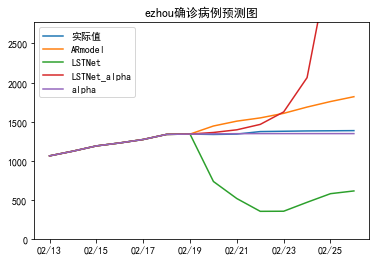

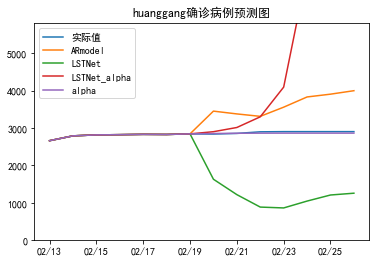

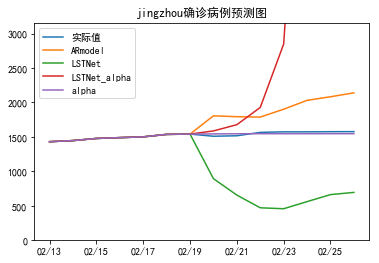

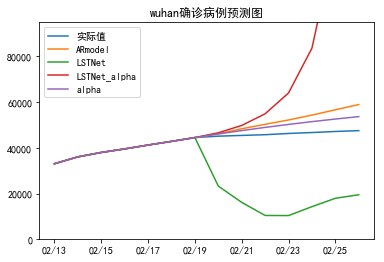

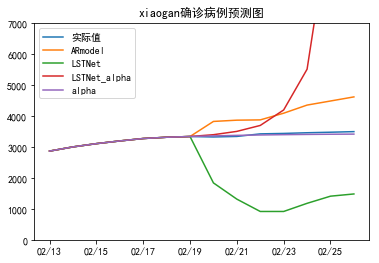

In [62]:
#下面的代码对四种模型进行总结
for site in ['ezhou','huanggang','jingzhou','wuhan','xiaogan']:
    data_path='county_data/{}.txt'.format(site)
    
    #对非湖北省数据进行预测
    
    #读取模型
    with open('save3/hubei_ARmodel.pt', 'rb') as f:
        model = torch.load(f)
    data_zj=pd.read_table(data_path,header=None,sep=',')
    
    dt=data_zj.iloc[-14:-7,:]
    #预测的前5个值
    first_7=dt
    print(first_7)
    dt=dt.values
    dt=np.expand_dims(dt,axis=0)
    # print(first_7)
    
    x=Variable(torch.FloatTensor(dt))
    y=model(x).data.numpy()
    # print(y)
    Y=np.expand_dims(y,axis=0)
    #预测的后5个值
    later_7=pd.DataFrame(y)
    new_dt=dt[:,1:,:]
    dt_1=np.concatenate((new_dt,Y),axis=1)
    for i in range(6):
        x=Variable(torch.FloatTensor(dt_1))
        y=model(x).data.numpy()
        Y=np.expand_dims(y,axis=0)
        later_7=later_7.append(pd.DataFrame(y))
        dt_1=dt_1[:,1:,:]
        dt_1=np.concatenate((dt_1,Y),axis=1)
    preditc_ARmodel=first_7.append(later_7).reset_index(drop=True)
    print(preditc_ARmodel)
    
    with open('save3/hubei_LSTNet.pt', 'rb') as f:
        model = torch.load(f)
    data_zj=pd.read_table(data_path,header=None,sep=',')
    
    dt=data_zj.iloc[-14:-7,:]
    #预测的前5个值
    first_7=dt
    dt=dt.values
    dt=np.expand_dims(dt,axis=0)
    
    x=Variable(torch.FloatTensor(dt))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    #预测的后5个值
    later_7=pd.DataFrame(y)
    new_dt=dt[:,1:,:]
    dt_1=np.concatenate((new_dt,Y),axis=1)
    for i in range(6):
        x=Variable(torch.FloatTensor(dt_1))
        y=model(x).data.numpy()
        Y=np.expand_dims(y,axis=0)
        later_7=later_7.append(pd.DataFrame(y))
        dt_1=dt_1[:,1:,:]
        dt_1=np.concatenate((dt_1,Y),axis=1)
    preditc_LSTNet=first_7.append(later_7).reset_index(drop=True)
    print(preditc_LSTNet)
    
    from math import log 
    #计算α值，截止到2.20日
    #并同时计算α的中位数和平均值
    data_zj=pd.read_table(data_path,header=None,sep=',')
    data_hubei=data_zj
    alpha=[]
    alpha_median=[]
    alpha_mean=[]
    for i in range(len(data_hubei)-2):
        up=log(data_hubei.iloc[2+i]/data_hubei.iloc[2+i-1])
        below=log(data_hubei.iloc[2+i-1]/data_hubei.iloc[2+i-2])
        if below==0:
            up=1;below=1
        alpha.append(up/below)
        alpha_median.append(np.median(alpha))
        alpha_mean.append(np.mean(alpha))
    
    hubei_predict=data_hubei[-14:]
    print(hubei_predict)
    alpha_select=alpha_median[-1]
    start=7
    for i in range(len(hubei_predict)-start):
        hubei_predict.iloc[start+i]=int(pow(hubei_predict.iloc[start+i-1]/hubei_predict.iloc[start+i-2],alpha_select)*hubei_predict.iloc[start+i-1])
    preditc_alpha=hubei_predict
    
    with open('save3/hubei_LSTnet_alpha.pt', 'rb') as f:
        model = torch.load(f)
    data_zj=pd.read_table(data_path,header=None,sep=',')
    
    dt=data_zj.iloc[-14:-7,:]
    #预测的前5个值
    first_7=dt
    dt=dt.values
    dt=np.expand_dims(dt,axis=0)
    
    x=Variable(torch.FloatTensor(dt))
    y=model(x).data.numpy()
    print(y)
    Y=np.expand_dims(y,axis=0)
    #预测的后5个值
    later_7=pd.DataFrame(y)
    new_dt=dt[:,1:,:]
    dt_1=np.concatenate((new_dt,Y),axis=1)
    for i in range(6):
        x=Variable(torch.FloatTensor(dt_1))
        y=model(x).data.numpy()
        Y=np.expand_dims(y,axis=0)
        later_7=later_7.append(pd.DataFrame(y))
        dt_1=dt_1[:,1:,:]
        dt_1=np.concatenate((dt_1,Y),axis=1)
    preditc_LSTnet_alpha=first_7.append(later_7).reset_index(drop=True)
    print(preditc_LSTnet_alpha)
    
    import matplotlib.dates as mdate
    plt.clf() 
    #显示新增治愈图像
    plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),data_zj.iloc[-14:,:],label='实际值')
    plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_ARmodel,label='ARmodel')
    plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTNet,label='LSTNet')
    plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTnet_alpha,label='LSTNet_alpha')
    plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_alpha,label='alpha')
    plt.legend()
    ax = plt.gca() 
    ax.xaxis.set_major_formatter(mdate.DateFormatter('%m/%d')) 
    # plt.show()
    # plt.ylim((0, data_zj.iloc[-1,:]*2))
    plt.ylim((0, data_zj.iloc[-1,0]*2))
    plt.title('{}确诊病例预测图'.format(site))
    plt.savefig('figure3/{}确诊病例.png'.format(site),dpi=500)
    plt.show()

In [21]:
#生成三个省的多元确诊人数数据
hubei=pd.read_table('allsum_data/data_hubei_2.26.txt',header=None,sep=',')
zhejiang=pd.read_table('allsum_data/data_zhejiang_2.26.txt',header=None,sep=',')
nohubei=pd.read_table('allsum_data/data_nohubei_2.26.txt',header=None,sep=',')
result=hubei
result.iloc[:,0]=hubei.iloc[:,2]
result.iloc[:,1]=zhejiang.iloc[:,2]
result.iloc[:,2]=nohubei.iloc[:,2]
result.to_csv('multi_data/three_province.txt',header=0,index=False)

In [58]:
#生成武汉省和5个县市的多元确诊数据
hubei=pd.read_table('allsum_data/data_hubei_2.26.txt',header=None,sep=',')
ezhou=pd.read_table('county_data/ezhou.txt',header=None,sep=',')
huanggang=pd.read_table('county_data/huanggang.txt',header=None,sep=',')
wuhan=pd.read_table('county_data/wuhan.txt',header=None,sep=',')
jingzhou=pd.read_table('county_data/jingzhou.txt',header=None,sep=',')
xiaogan=pd.read_table('county_data/xiaogan.txt',header=None,sep=',')
result=hubei
result.iloc[:,0]=hubei.iloc[:,2]
result.iloc[:,1]=ezhou
result.iloc[:,2]=huanggang.values
result.insert(3,'jingzhou',jingzhou)
result.insert(4,'wuhan',wuhan)
result.insert(5,'xiaogan',xiaogan)
# result.iloc[:,1]=ezhou
print(result)
result.to_csv('multi_data/province_county.txt',header=0,index=False)



          0     1     2  jingzhou  wuhan  xiaogan
0     549.0     0    12         8    495       22
1     730.0     1    64        10    572       26
2    1058.0     1   122        33    618       55
3    1423.0    20   154        47    698      100
4    2714.0    57   213        71   1590      173
5    3554.0    84   324       101   1905      274
6    4903.0   123   496       151   2261      399
7    5806.0   189   573       221   2639      541
8    7153.0   227   726       287   3215      628
9    9074.0   278  1002       333   4109      749
10  11177.0   306  1246       499   5142      918
11  13522.0   332  1422       613   6384     1120
12  16678.0   382  1645       713   8351     1462
13  19665.0   423  1807       801  10117     1886
14  22112.0   471  1897       885  11618     2141
15  24953.0   569  2041       941  13603     2313
16  27100.0   639  2141       997  14982     2436
17  29631.0   725  2252      1045  16902     2541
18  31728.0   790  2332      1075  18454     2642
